In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df=pd.read_csv(r"C:\Users\veere\Downloads\50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

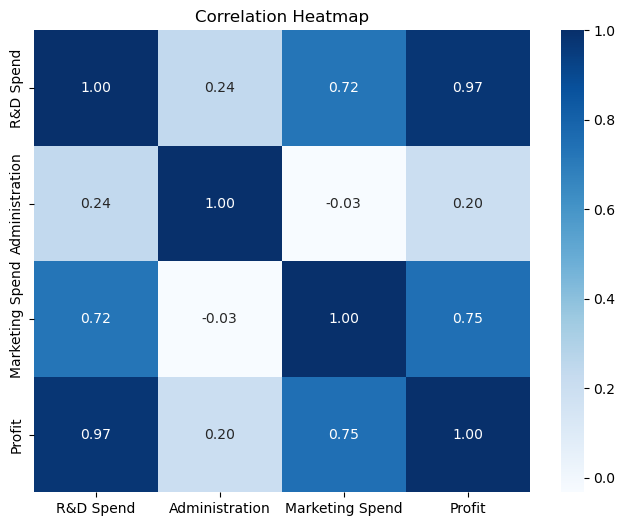

In [6]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

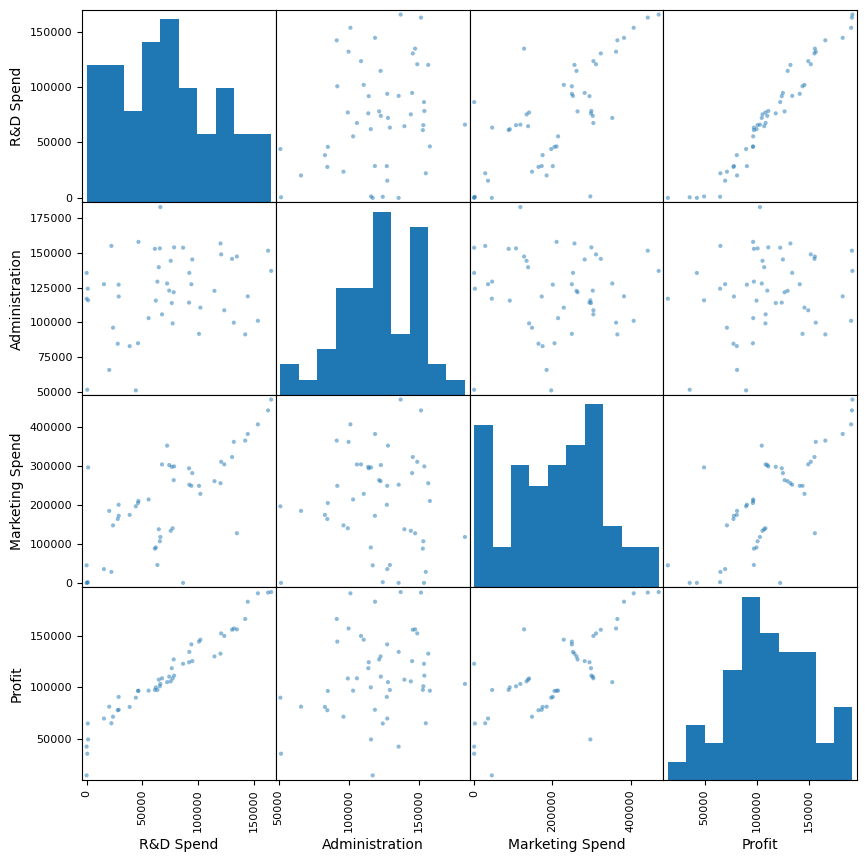

In [7]:
# Create scatter plots for all pairs of variables
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()

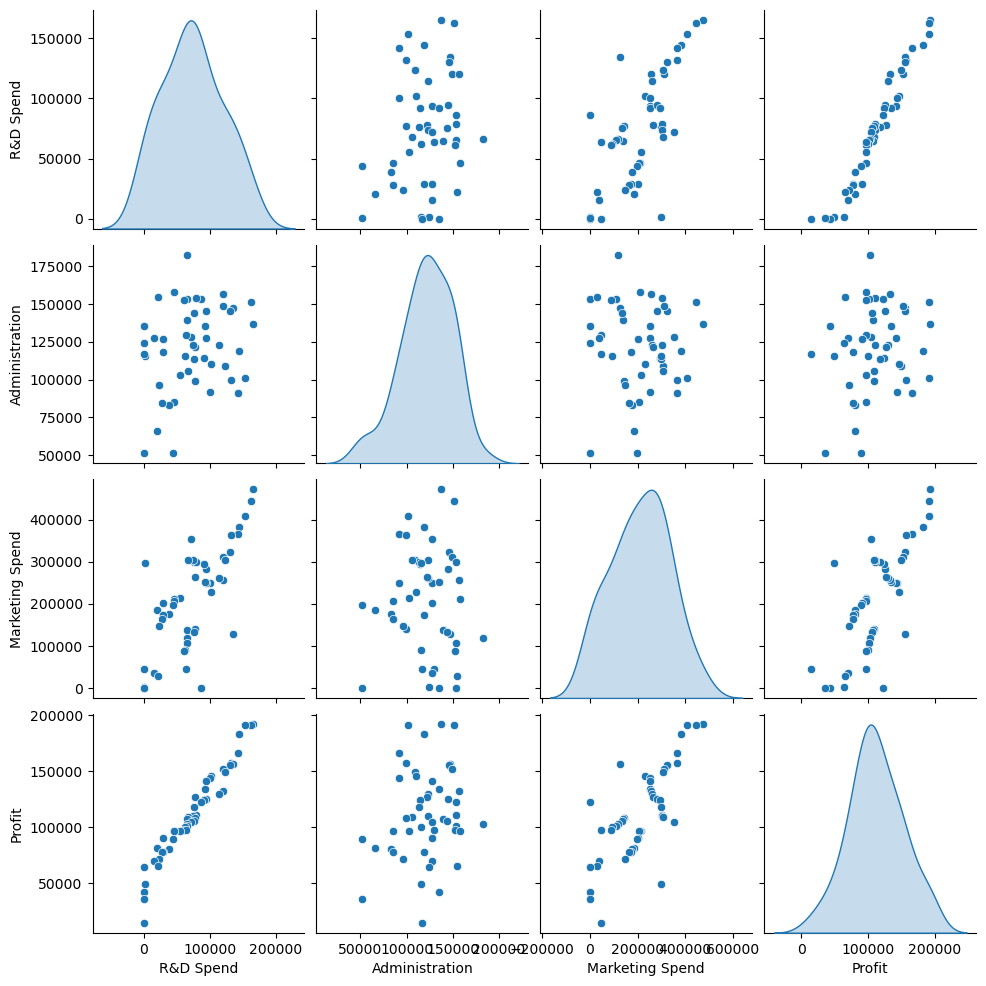

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in the DataFrame 'df'
sns.pairplot(df, diag_kind='kde')  # diag_kind='kde' plots kernel density estimates on the diagonal
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing_pipeline(data):
    # Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    # Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    # Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    # Normalize numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numeric_features])
    data[numeric_features] = scaler.transform(data[numeric_features])

    for feature in categorical_features:
        if data[feature].isnull().any():
            mode_value = data[feature].mode().iloc[0]
            data[feature] = data[feature].fillna(mode_value)

    return data


In [10]:
df=data_preprocessing_pipeline(df)

In [11]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.093592
1,1.955860,1.082807,1.923600,2.081032
2,1.754364,-0.728257,1.626528,2.061201
3,1.554784,-0.096365,1.422210,1.843336
4,1.504937,-1.079919,1.281528,1.396449


In [12]:
# Separate features (X) and target variable (y)
x = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [13]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528


In [14]:
y.head()

0    2.093592
1    2.081032
2    2.061201
3    1.843336
4    1.396449
Name: Profit, dtype: float64

In [15]:
# Split the data into train and test sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x_train.head()

,R&D Spend,Administration,Marketing Spend
12,0.443260,0.215449,0.320617
4,1.504937,-1.079919,1.281528
37,-0.652532,-2.525994,-0.115608
8,1.030369,0.986952,0.830887
3,1.554784,-0.096365,1.422210


In [17]:
y_train.head()

12    0.738649
4     1.396449
37   -0.641964
8     1.022765
3     1.843336
Name: Profit, dtype: float64

In [18]:
# Initialize and train different regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)

In [19]:
# Fit the models on the training data
linear_reg.fit(x_train, y_train)
decision_tree_reg.fit(x_train, y_train)
random_forest_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
decision_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
linear_reg.fit(x_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test data
linear_reg_pred = linear_reg.predict(x_test)
decision_tree_pred = decision_tree_reg.predict(x_test)
random_forest_pred = random_forest_reg.predict(x_test)

In [23]:
# Calculate different regression metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

In [24]:
linear_reg_metrics = calculate_metrics(y_test, linear_reg_pred)
decision_tree_metrics = calculate_metrics(y_test, decision_tree_pred)
random_forest_metrics = calculate_metrics(y_test, random_forest_pred)

In [25]:
# Print the regression metrics for each model
print("Linear Regression Metrics:")
print("Mean Squared Error:", linear_reg_metrics[0])
print("Mean Absolute Error:", linear_reg_metrics[1])
print("R-squared:", linear_reg_metrics[2]*100)

Linear Regression Metrics:
Mean Squared Error: 0.0797317362413119
Mean Absolute Error: 0.21390105644673638
R-squared: 86.22709231287398


In [26]:
print("Decision Tree Regression Metrics:")
print("Mean Squared Error:", decision_tree_metrics[0])
print("Mean Absolute Error:", decision_tree_metrics[1])
print("R-squared:", decision_tree_metrics[2]*100)

Decision Tree Regression Metrics:
Mean Squared Error: 0.05434021002353266
Mean Absolute Error: 0.17417931838769748
R-squared: 90.61323970058774


In [27]:
print("Random Forest Regression Metrics:")
print("Mean Squared Error:", random_forest_metrics[0])
print("Mean Absolute Error:", random_forest_metrics[1])
print("R-squared:", random_forest_metrics[2]*100)

Random Forest Regression Metrics:
Mean Squared Error: 0.09030594440265642
Mean Absolute Error: 0.20408015901587304
R-squared: 84.40049728639828


In [29]:
# Create and train a Decision Tree model
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(x, y)

DecisionTreeRegressor()

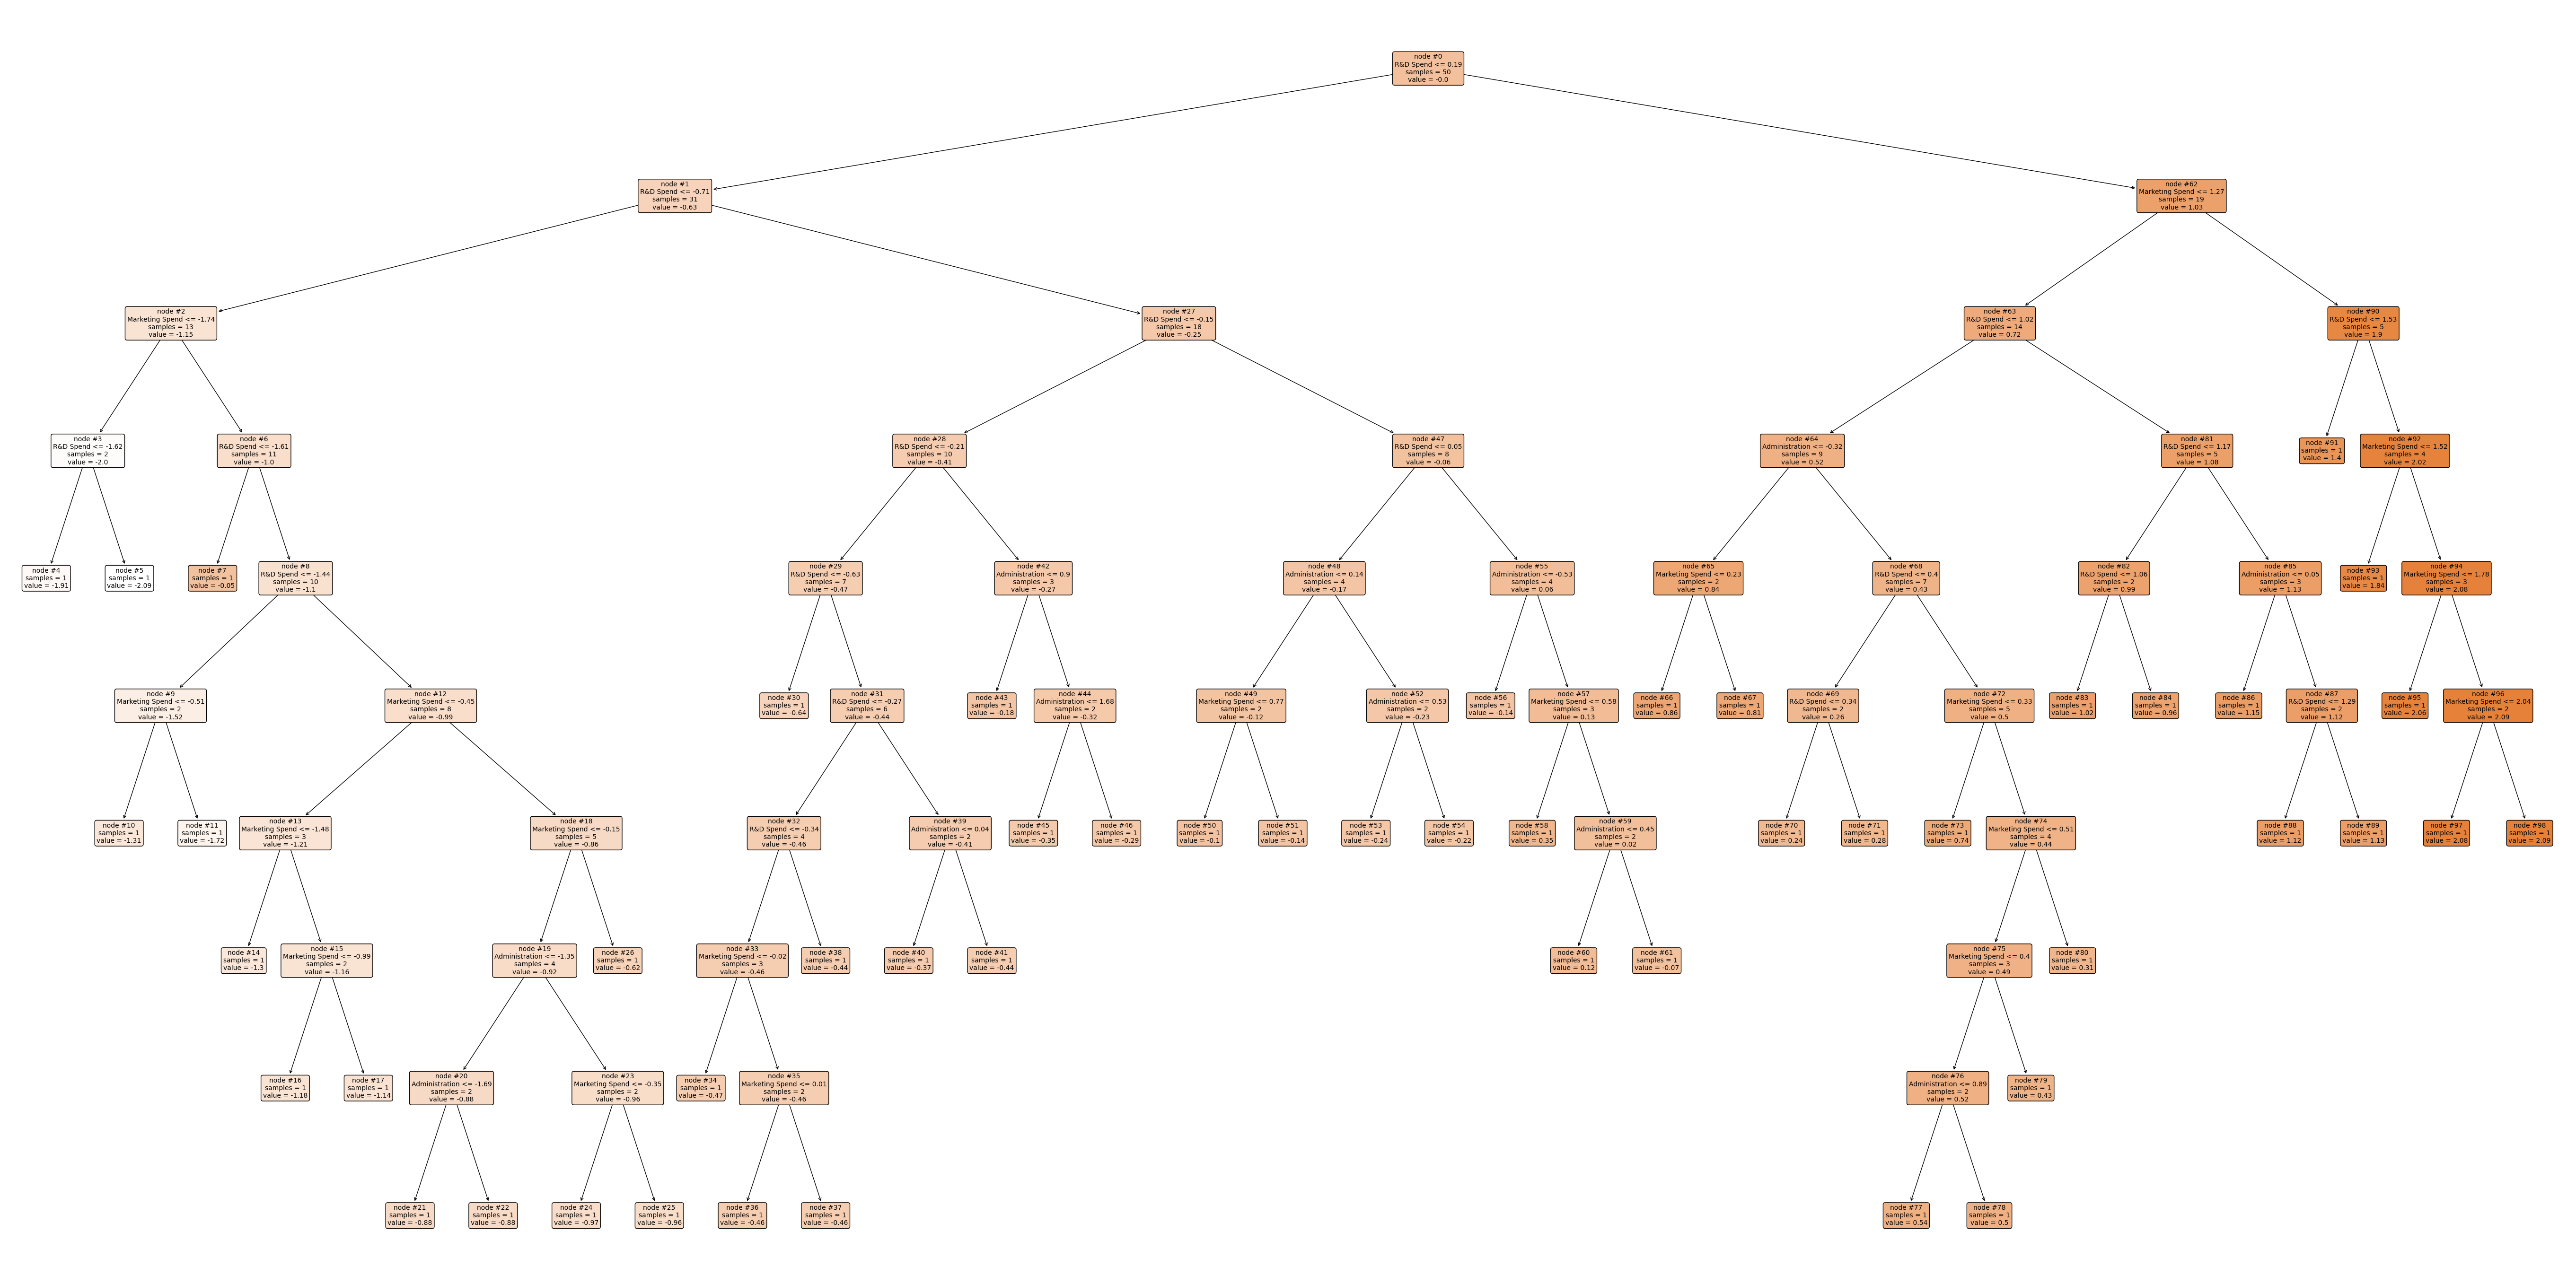

In [30]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Import plot_tree function
import matplotlib.pyplot as plt
x = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']
# Convert the Index object to a list for feature_names
feature_names = x.columns.tolist()

# Increase spacing and adjust visualization settings
plt.figure(figsize=(70, 35))  # Increase figsize for larger spacing

# Use plot_tree from the tree module
plot_tree(decision_tree_reg, 
          filled=True, 
          feature_names=feature_names, 
          rounded=True, 
          fontsize=10,   # Adjust the font size for nodes
          impurity=False,  # Turn off impurity information
          precision=2,  # Set the number of decimal places for display
          node_ids=True)  # Show the node IDs

plt.show()


In [28]:
# Choose the best model

Based on the provided metrics, it appears that the Decision Tree Regression model is performing the best. Here's why:

Mean Squared Error (MSE): Lower values are better. The Decision Tree model has the lowest MSE (0.0543), indicating that it is making the most accurate predictions compared to the other models.

Mean Absolute Error (MAE): Lower values are better. The Decision Tree model also has the lowest MAE (0.1742), meaning that, on average, its predictions are closest to the actual values.

R-squared (R²): Higher values are better. The Decision Tree model has the highest R-squared (90.61%), indicating that it explains a larger proportion of the variance in the target variable compared to the other models.

Overall, based on these metrics, the Decision Tree Regression model is the best-performing model among the ones provided. It has the lowest errors and the highest R-squared value, suggesting that it provides the most accurate and reliable predictions for the given data.